In [ ]:
%load_ext autoreload
%autoreload 2

# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math
import sys
import os

import sys
sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
import src.funciones as f
import src.soporte_prep as spp
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_pickle('../datos/df_sin_out.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4389 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4389 non-null   int64   
 1   Attrition                4389 non-null   int64   
 2   BusinessTravel           4389 non-null   object  
 3   Department               4389 non-null   object  
 4   DistanceFromHome         4389 non-null   int64   
 5   Education                4389 non-null   category
 6   EducationField           4389 non-null   object  
 7   Gender                   4389 non-null   object  
 8   JobLevel                 4389 non-null   category
 9   JobRole                  4389 non-null   object  
 10  MaritalStatus            4389 non-null   object  
 11  MonthlyIncome            4389 non-null   float64 
 12  NumCompaniesWorked       4389 non-null   float64 
 13  PercentSalaryHike        4389 non-null   int64   
 14  StockOptionLe

In [ ]:
lista_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist() # saco mis columnas numéricas

if 'Attrition' in lista_num:
    lista_num.remove('Attrition')

In [5]:
lista_num

['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
df_estandar = f.escalar_columnas(df, lista_num) # aqui meto las estandarizaciones a mis columnas numericas

In [19]:
df_estandar.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsWithCurrManager_norm,Age_stand,DistanceFromHome_stand,MonthlyIncome_stand,NumCompaniesWorked_stand,PercentSalaryHike_stand,TotalWorkingYears_stand,YearsAtCompany_stand,YearsSinceLastPromotion_stand,YearsWithCurrManager_stand
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,0.000000,1.549454,-0.390768,1.402315,-0.679603,-1.152377,-1.329568,-0.994069,-0.680340,-1.157615
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,0.008419,-0.649238,0.105063,-0.492681,-1.079976,2.131897,-0.679535,-0.324953,-0.367930,-0.033613
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,0.001373,-0.539303,0.972768,2.720979,-0.679603,-0.057619,-0.809542,-0.324953,-0.680340,-0.314613
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,0.005312,0.120304,-0.886599,0.384447,0.121143,-1.152377,0.230511,0.176883,1.506527,0.247388
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,0.014964,-0.539303,0.105063,-0.884757,0.521516,-0.878687,-0.289516,-0.157674,-0.680340,-0.033613


In [13]:
df_estandar.describe()

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,YearsWithCurrManager_norm,Age_stand,DistanceFromHome_stand,MonthlyIncome_stand,NumCompaniesWorked_stand,PercentSalaryHike_stand,TotalWorkingYears_stand,YearsAtCompany_stand,YearsSinceLastPromotion_stand,YearsWithCurrManager_stand
count,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,...,4389.000000,4.389000e+03,4.389000e+03,4.389000e+03,4.389000e+03,4.389000e+03,4.389000e+03,4.389000e+03,4.389000e+03,4.389000e+03
mean,36.905673,0.161312,9.152427,735.622817,2.697425,15.210526,11.226931,6.942584,2.177717,4.119617,...,0.008433,5.807865e-17,2.064119e-17,1.404411e-16,-4.330603e-17,-1.902228e-16,-9.511138e-17,-2.145065e-17,5.342427e-17,2.954524e-17
std,9.097353,0.367861,8.068178,532.384117,2.497956,3.654192,7.692797,5.978721,3.201291,3.559118,...,0.010041,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00
min,18.000000,0.000000,1.000000,114.017000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-2.078388e+00,-1.010557e+00,-1.167722e+00,-1.079976e+00,-1.152377e+00,-1.459575e+00,-1.161348e+00,-6.803397e-01,-1.157615e+00
25%,30.000000,0.000000,2.000000,328.943000,1.000000,12.000000,6.000000,3.000000,0.000000,2.000000,...,0.001666,-7.591725e-01,-8.865994e-01,-7.639712e-01,-6.796031e-01,-8.786874e-01,-6.795353e-01,-6.595111e-01,-6.803397e-01,-5.956135e-01
50%,36.000000,0.000000,7.000000,557.768000,2.000000,14.000000,10.000000,5.000000,1.000000,3.000000,...,0.005200,-9.956483e-02,-2.668102e-01,-3.341104e-01,-2.792302e-01,-3.313084e-01,-1.595091e-01,-3.249533e-01,-3.679301e-01,-3.146130e-01
75%,43.000000,0.000000,14.000000,947.053000,4.000000,18.000000,15.000000,9.000000,3.000000,7.000000,...,0.011444,6.699774e-01,6.008948e-01,3.971837e-01,5.215155e-01,7.634497e-01,4.905237e-01,3.441623e-01,2.568891e-01,8.093890e-01
max,60.000000,1.000000,29.000000,2259.887000,9.000000,25.000000,40.000000,40.000000,15.000000,17.000000,...,0.085076,2.538866e+00,2.460262e+00,2.863417e+00,2.523380e+00,2.679276e+00,3.740687e+00,5.529808e+00,4.005804e+00,3.619394e+00


In [14]:
df_estandar.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Age_robust',
       'DistanceFromHome_robust', 'MonthlyIncome_robust',
       'NumCompaniesWorked_robust', 'PercentSalaryHike_robust',
       'TotalWorkingYears_robust', 'YearsAtCompany_robust',
       'YearsSinceLastPromotion_robust', 'YearsWithCurrManager_robust',
       'Age_minmax', 'DistanceFromHome_minmax', 'MonthlyIncome_minmax',
       'NumCompaniesWorked_minmax', 'PercentSalaryHike_minmax',
       'TotalWorkingYears_minmax', 'YearsAtCompany_minmax',
       'YearsSinceLastPromotion_min

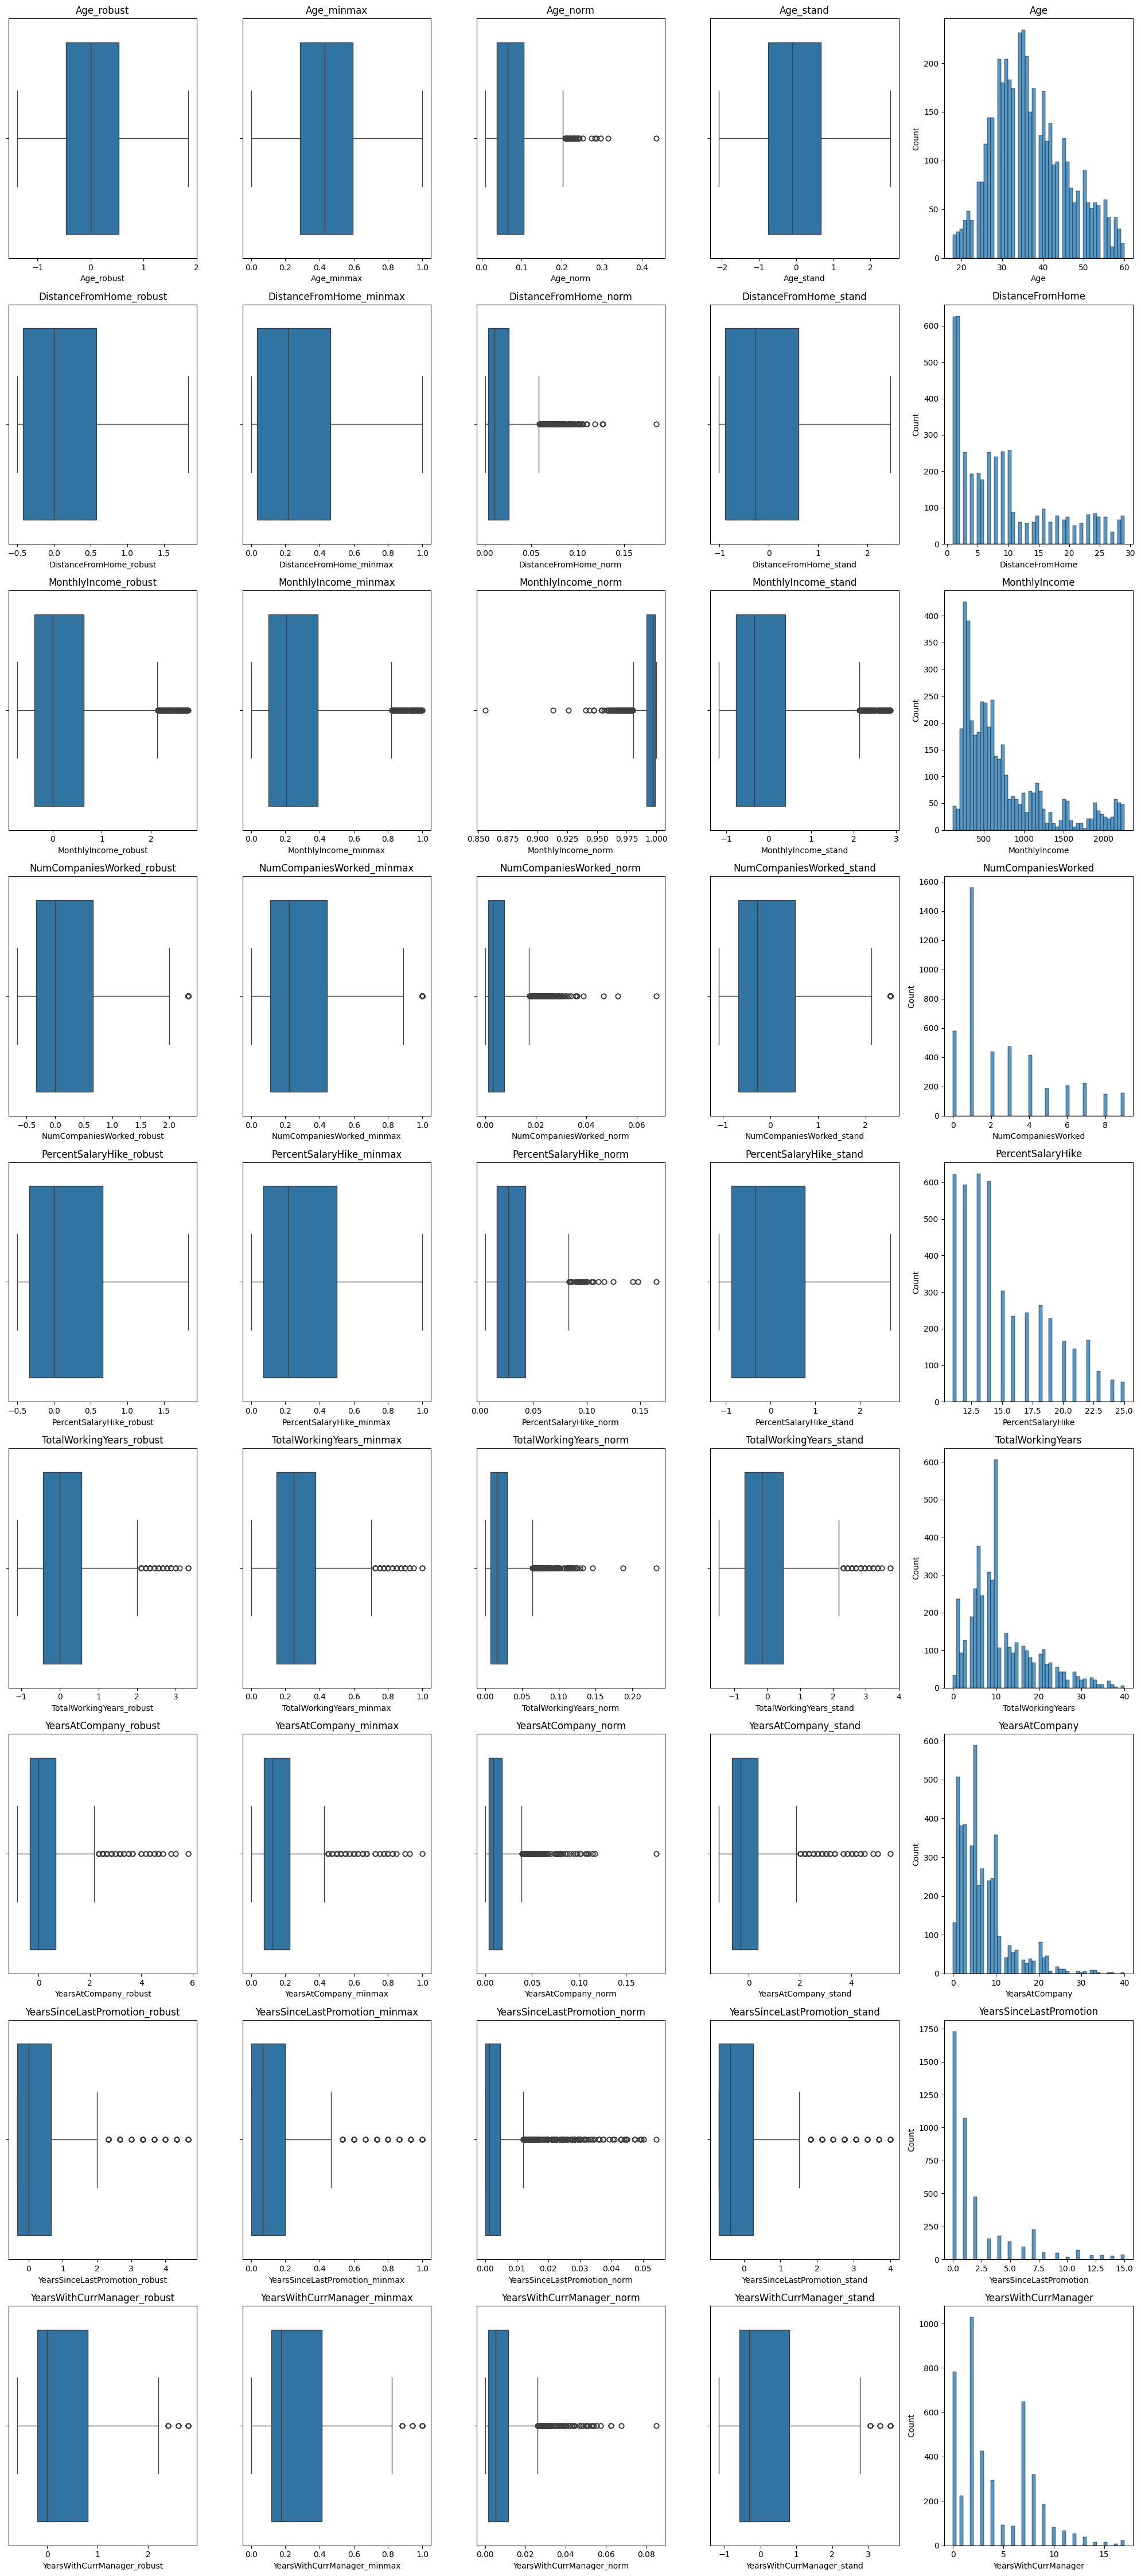

In [ ]:
f.visualizar_escalados_completos(df_estandar, lista_num)

## Observaciones:
- En la variable edad se podría decir que sigue una distribución casi normal. Esto se traduce a la ausencia de outliers. A la vez sigue una representación lógica de la realidad, personas por encima de los 18 años (legalmente pueden trabajar) y un tope máximo de 60 años para trabajar. Esta suele ser una edad para el retiro, sin embargo no tengo la certeza de que en este país ese sea el caso.
- DistanceFromHome, muchos empleados viven cerca del trabajo que es algo positivo ya que no tienen la necesidad de movilizarse por grandes distancias para llegar a su lugar de trabajo. Además puede contribuir a menos personas usando métodos de transporte y que estos no se vean muy congestionados. Sin embargo, vemos que tenemos una distancia máxima de 30 km. Se puede observar una menor cantidad de personas que se encuentran a un radio mayor a los 10 kms, estos no representan la gran mayoría pero son casos que se pueden presentar.
- Existe un gran pico de personas que tienen salarios bajos, entre los3 300 y 900 euros mensuales. Esto tiene mucho sentido considerando que más del 70% de los empleados aquí es encuentran en un nivel 1 y 2. En esta sí existen algunos outliers ya que la ganancia mensual puede elevarse por encima de los 2000 euros al mes, pero esto resalta negativamente en esta distribución.
- NumCompaniesWorked, hay mayor presencia en los dos primeros grupos. Lo que dice que este resulta ser el primer o segundo trabajo.
- PercentySalaryHike, tiene mayor presencia en los primeros grupos. Esto nos dice que en cuanto al porcentaje de aumento, resaltan los valores mas bajos.
- TotalWorkingYears, se puede ver un aumento hasta los 10 años en la cantidad de empleados presentes. A partir de allí hay una amplia disminución de presencia. Esto pudiera sugerir que apostan por una empleabilidad con cierta juventud y que se va abriendo pasos en el mercado laboral.
- YearsatCompany, va un poco relacionado con la columna anterior. Aquí hay gran presencia de empleados hasta los 6-7 años de presencia. A partir de este punto es que empieza a disminuir la presencia de empleados.
- YearsSinceLastPromotion tiene valores altos hasta los 2 años y medio. Esto pudiera señalar que normalmente este es un punto de inflexión, por lo que suelen darse promociones después de este período.
- En cuanto a YearsWithCurrentManager aquí e ve una influencia similar a lo anterior, donde se ven valores altos en los primeros años debajo del mismo manager. A partir de este momento se ven bajadas. 

In [20]:
columnas_seleccionadas = ['Age_robust', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome_robust',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome_robust', 'NumCompaniesWorked_robust',
       'PercentSalaryHike_robust', 'StockOptionLevel', 'TotalWorkingYears_robust',
       'TrainingTimesLastYear', 'YearsAtCompany_robust', 'YearsSinceLastPromotion_robust',
       'YearsWithCurrManager_robust', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']

In [21]:
df_estandar_fil = df_estandar[columnas_seleccionadas]

# Mostrar el DataFrame reducido
df_estandar_fil.head()


,Age_robust,Attrition,BusinessTravel,Department,DistanceFromHome_robust,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears_robust,TrainingTimesLastYear,YearsAtCompany_robust,YearsSinceLastPromotion_robust,YearsWithCurrManager_robust,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1.153846,0,Travel_Rarely,Sales,-0.083333,2,Life Sciences,Female,1,Healthcare Representative,...,-1.000000,6,-0.666667,-0.333333,-0.6,3.0,4.0,2.0,3,3
1,-0.384615,1,Travel_Frequently,Research & Development,0.250000,1,Life Sciences,Female,1,Research Scientist,...,-0.444444,3,0.000000,0.000000,0.2,3.0,2.0,4.0,2,4
2,-0.307692,0,Travel_Frequently,Research & Development,0.833333,4,Other,Male,4,Sales Executive,...,-0.555556,2,0.000000,-0.333333,0.0,2.0,2.0,1.0,3,3
3,0.153846,0,Non-Travel,Research & Development,-0.416667,5,Life Sciences,Male,3,Human Resources,...,0.333333,5,0.500000,2.000000,0.4,4.0,4.0,3.0,2,3
4,-0.307692,0,Travel_Rarely,Research & Development,0.250000,1,Medical,Male,1,Sales Executive,...,-0.111111,2,0.166667,-0.333333,0.2,4.0,1.0,3.0,3,3


In [22]:
df_estandar_fil.to_pickle('../datos/df_estandarizado.pkl')